# 1. File I/O Settings

In [1]:
hindcast_data_file = 'test_data/NMME_data_BD.csv' #data used for cross-validated hindcast skill analysis, and to train forecast model
hindcast_has_years = True
hindcast_has_header = False
hindcast_has_obs = True #NOTE: This is mandatory 
hindcast_export_file = 'bd.csv' #'None' or the name of a file to save cross validated hindcasts 

forecast_data_file = 'test_data/NMME_data_BD_forecast.csv' #data fed to trained model to produce forecasts, or None
forecast_has_years = True
forecast_has_header = False
forecast_has_obs = True #NOTE: for Forecasting, observations are optional
forecast_export_file = 'bd_rtf.csv'

# 2. Cross-Validated Hindcast Skill Evaluation
#### 2a. Analysis Settings

In [2]:
mme_methodologies = ['EM', 'MLR', 'ELM'] #list of MME methodologies to use 
skill_metrics = [ 'MAE', 'IOA', 'MSE', 'RMSE', 'PearsonCoef', 'SpearmanCoef'] #list of metrics to compute - available: ['SpearmanCoef', 'SpearmanP', 'PearsonCoef', 'PearsonP', 'MSE', 'MAE', 'RMSE', 'IOA']

#### 2b. Model Parameters

In [3]:
args = {
    #EnsembleMean settings
    'em_xval_window': 1,               #odd number - behavior undefined for even number

    #MLR Settings
    'mlr_fit_intercept': True,         #Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered) (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    'mlr_xval_window': 1,               #odd number - behavior undefined for even number
    'mlr_standardization': None,        #'std_anomaly' or None

    #ELM Settings 
    'elm_xval_window': 1,              #odd number - behavior undefined for even number
    'elm_hidden_layer_neurons':10,     #number of hidden layer neurons - overridden if using PCA init
    'elm_activation': 'sigm',          #“lin” for linear, “sigm” or “tanh” for non-linear, “rbf_l1”, “rbf_l2” or “rbf_linf” for radial basis function neurons (https://hpelm.readthedocs.io/en/latest/api/elm.html)
    'elm_standardization' : 'minmax',  #'minmax' or 'std_anomaly' or None
    'elm_minmax_range': [-1, 1]        #choose [minimum, maximum] values for minmax scaling. ignored if not using minmax scaling
}


#### 2c. Model Construction - Do Not Edit 

In [4]:
from src import * 

reader = Reader()  #Object that will handle our input data
data = reader.read_txt(hindcast_data_file, has_years=hindcast_has_years, has_obs=hindcast_has_obs, has_header=hindcast_has_header)
mme = MME(data)
mme.train_mmes(mme_methodologies, args)
mme.measure_skill(skill_metrics)

EM [*************************]


#### 2d. Cross-Validated Hindcast Timeline - Do Not Edit

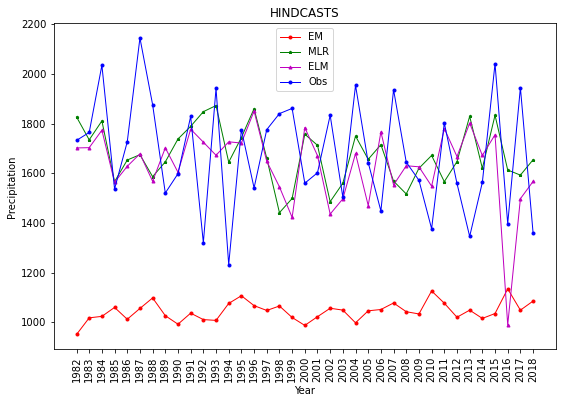

In [5]:
ptr = Plotter(mme)
ptr.timeline(methods=mme_methodologies, members=False, obs=True)

#### 2e. Cross-Validated Hindcast Skill Metrics & Distributions - Do Not Edit

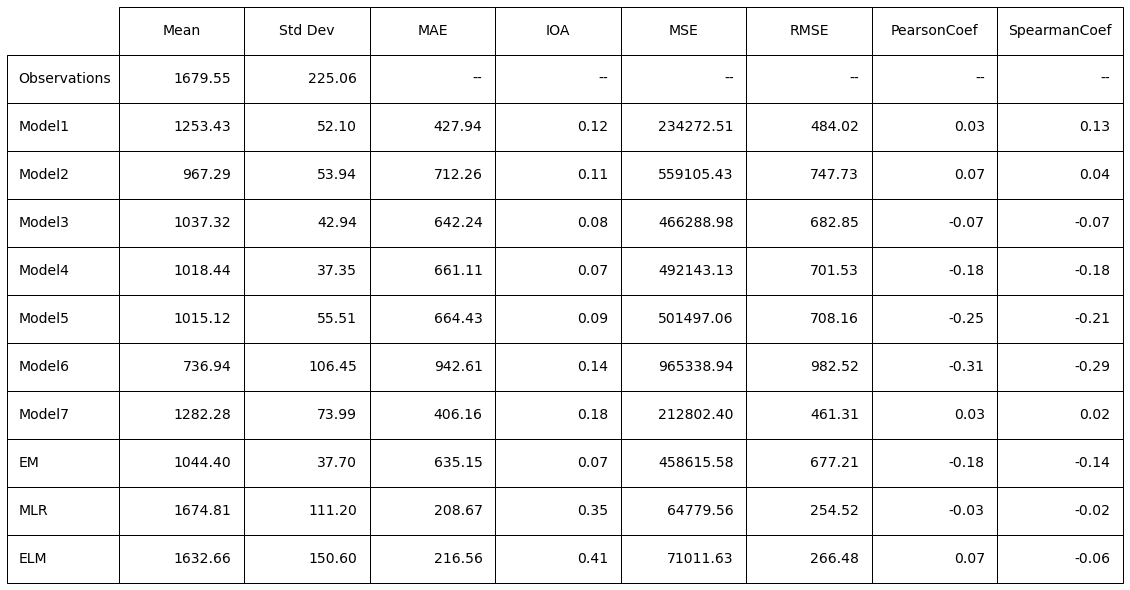

In [6]:
ptr.skill_matrix(methods=mme_methodologies, metrics=skill_metrics, obs=True, members=True)

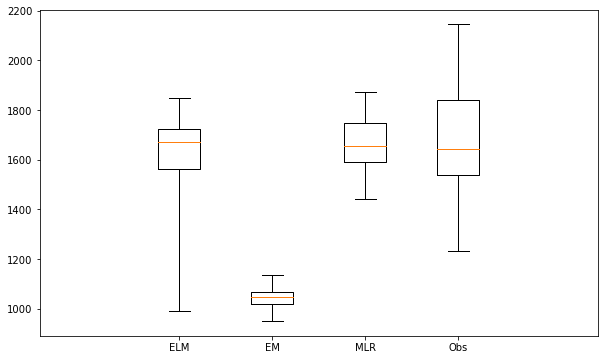

In [7]:
ptr.box_plot(methods=mme_methodologies, obs=True, members=False)

#### 2f. Saving MME & Exporting Cross-Validated Hindcasts - Do Not Edit

In [8]:
mme.export_csv(hindcast_export_file)

# 3. Real Time Forecasting
#### 3a. RTF Settings

In [9]:
forecast_methodologies = ['EM', 'MLR', 'ELM' ]

#### 3b. Computation - do not edit

In [10]:
fcst_data = reader.read_txt(forecast_data_file, has_years=forecast_has_years, has_obs=forecast_has_obs)
mme.add_forecast(fcst_data)
mme.train_rtf_models(forecast_methodologies, args)
mme.make_RTFs(forecast_methodologies)

None
None
[[-0.07011543]
 [-0.07011543]]
minmax
[[1656.7566975]
 [1656.7566975]]


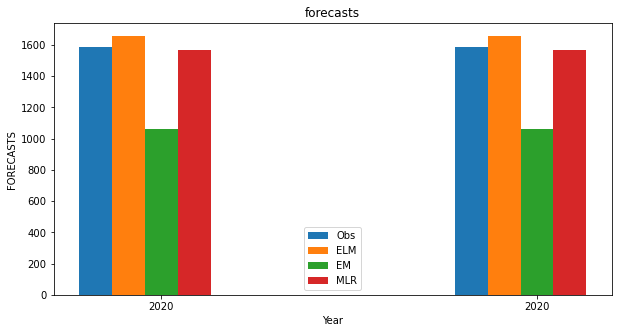

In [11]:
ptr.bar_plot(methods=mme_methodologies, members=False, obs=forecast_has_obs)

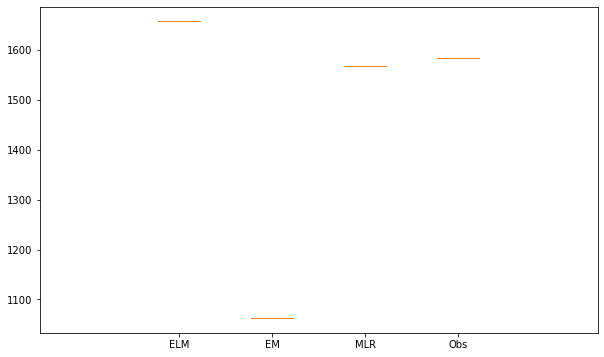

In [12]:
ptr.box_plot(fcst='forecasts', obs=forecast_has_obs)

In [13]:
mme.export_csv(forecast_export_file, fcst='forecasts', obs=forecast_has_obs)